# 0

In [1]:
import time
time_start = time.process_time()
#run your code
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

Run time: 0.000 s


# 1a)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the convolution function which convolves two lists into one using a simple mathematical expression
def myconv(list1,list2):
    len1=len(list1)
    len2=len(list2)
    
    # Below we assign the longer list to x and shorter list to h to ensure the elements compiling efficiency
    if len1> len2:
        h=list2
        x=list1
    else:
        h=list1
        x=list2
    len3=len1+len2-1
    #print(len3)
    y=[0]*len3
    i=0
    # below we loop through summing up our elements as h moves through x 
    for i in range(0,len3):
        j=0
        for j in range(0,len(h)):
            if i-j >=0:
                if i-j < len(x):
                    y[i]+=x[i-j]*h[j]
                    #print(y[i], x[i-j], h[j], i,j,i-j)
    return y

# Testing:

x=[1,3,4,2,5]
y=[1,3,2]
o=myconv(x,y)
print(o)
d=np.convolve(x,y)
print(d)




[1, 6, 15, 20, 19, 19, 10]
[ 1  6 15 20 19 19 10]


# 1b) Filters

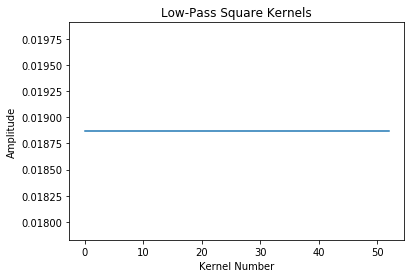

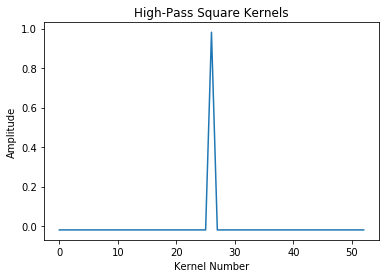

Run time: 0.328 s


In [3]:
time_start = time.process_time()

# Below are low and High pass square filters which output arrays that can be used to convolve with a list to filter
# They return a list of values that are normalized delta 
def lowSquare(L1):
    lsquare=[0]*L1
    i = 0
    for i in range(0,L1):
        lsquare[i]=1/L1
    return lsquare
def highSquare(L2):
    hsquare=[0]*L2
    delta=[0]*L2
    i = 0    
    for i in range(0,L2):
        if i == int(L2/2):
            delta[i]=1
            hsquare[i]=delta[i]-1/L2
        else:
            hsquare[i]=delta[i]-1/L2
    return hsquare
j=lowSquare(53)
k=highSquare(53)
#print(sum(j),sum(k))
plt.plot(j)
plt.xlabel('Kernel Number')
plt.ylabel('Amplitude')
plt.title("Low-Pass Square Kernels")
plt.show()
plt.plot(k)
plt.xlabel('Kernel Number')
plt.ylabel('Amplitude')
plt.title("High-Pass Square Kernels")
plt.show()







time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

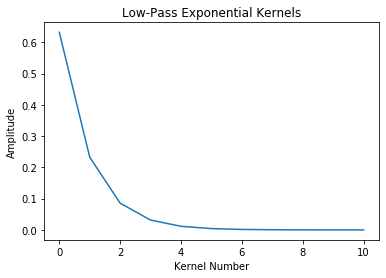

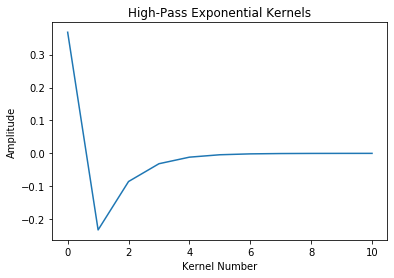

In [4]:
# Low and high pass exponential filters which return a list of values that are normalized exponential of input number of 
# values
def lowExp(L3):
    lExp=[0]*L3
    i=0
    sum=0
    for i in range(0,L3):
        lExp[(L3-1)-i]=np.exp(i)
        sum += lExp[(L3-1)-i]
        #print((L3-1)-i)
    j=0
    for j in range(0,L3):
        lExp[(L3-1)-j]= lExp[(L3-1)-j]/sum
    return lExp
def highExp(L4):
    hExp=[0]*L4
    hExp2=[0]*L4
    delta=[0]*L4
    i=0
    sum=0
    for i in range(0,L4):
        hExp[(L4-1)-i]=np.exp(i)
        #print(i)
        sum += hExp[(L4-1)-i]
    
    j=0
    for j in range(0,L4):
        if j == (L4-1):
            delta[j]=1
            hExp2[(L4-1)-j]=delta[j]- hExp[(L4-1)-j]/sum
        else:
            hExp2[(L4-1)-j]=delta[j]- hExp[(L4-1)-j]/sum
        #print(hExp[(L4-1)-j]/sum)
    return hExp2
e=lowExp(11)
plt.xlabel('Kernel Number')
plt.ylabel('Amplitude')
plt.title("Low-Pass Exponential Kernels")
plt.plot(e)
plt.show()
f=highExp(11)
plt.xlabel('Kernel Number')
plt.ylabel('Amplitude')
plt.title("High-Pass Exponential Kernels")
plt.plot(f)
plt.show()
#print(sum(e),sum(f))

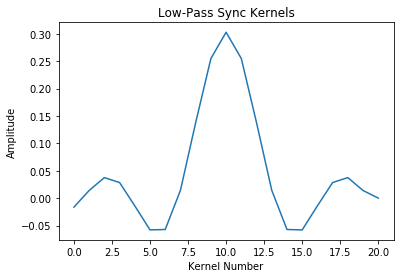

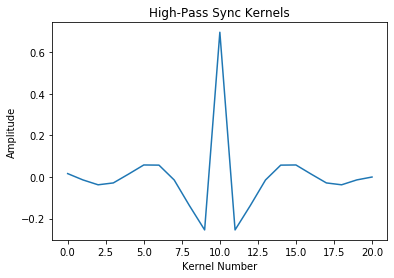

In [5]:

# Low and high pass sync filters which return a list of values that are normalized sync of input number of 
# values
def lowSync(L5):
    lsyn=[0]*L5
    i=0
    k=1/100000000
    sum=0
    L8=int(L5/2)
    for i in range(-L8,L8):
        if i==0:
            lsyn[i+L8]=np.sin(i+k)/(i+k)
            #print(lsyn[i+L8],i+1,np.sin(i))
        else:
            lsyn[i+L8]=np.sin(i)/(i)
        sum +=lsyn[i+L8]
        #print(i)
    j=0
    for j in range(0,L5):
        lsyn[j]= lsyn[j]/sum
        #print(lsyn[j])
    return lsyn

def highSync(L6):
    hsyn=[0]*L6
    hsyn2=[0]*L6
    delta=[0]*L6
    i=0
    h=1/100000000
    L7=int(L6/2)
    sum=0
    for i in range(-L7,L7):
        if i==0:
            hsyn[i+L7]=np.sin(i+h)/(i+h)
            #print(lsyn[i+L8],i+1,np.sin(i))
        else:
            hsyn[i+L7]=np.sin(i)/(i)
        sum +=hsyn[i+L7]
    #print(hsyn/sum)
    j=0
    for j in range(0,L6):
        if j==L7:
            delta[j]=1
            hsyn2[j]=delta[j]- (hsyn[j]/sum)
        else:
            hsyn2[j]=delta[j]- hsyn[j]/sum
        #print(delta[j],hsyn[j]/sum,hsyn2[j])
    
    return hsyn2


w=lowSync(21)
#print(sum(w))
plt.xlabel('Kernel Number')
plt.ylabel('Amplitude')
plt.title("Low-Pass Sync Kernels")
plt.plot(w)
plt.show()
v=highSync(21)
#print(sum(v))
plt.xlabel('Kernel Number')
plt.ylabel('Amplitude')
plt.title("High-Pass Sync Kernels")
plt.plot(v)
plt.show()
#print(w,v)


# 1c)

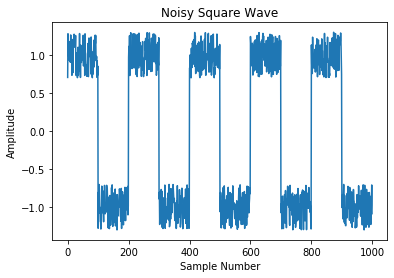

In [6]:
from scipy import signal

# Generating a square wave of frequency 5 hz
f=5.0 # frequency of the sin wave in Hz
T=1/f
fs=100.0*f
Ts=1/fs # horizontal spacing of the points that "fake" a continuous signal
cycles=20 # how many cycles of the wave to save
t=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
x=signal.square(2*np.pi*f*t)

# Sampling of the "continous signal" from above 

f1=5.0 # frequency of the sin wave in Hz
T1=1/f1
fs1=1000
Ts1=1/fs1 # horizontal spacing of the points that "fake" a continuous signal
cycles1=20 # how many cycles of the wave to save
t1=np.arange(0,cycles1*T1,Ts1) # horizontal coordinate of your sin curve
x1=signal.square(2*np.pi*f1*t1)

# generating uniform numbers between -0.3 and 0.3 to add to square wave as noise
N=len(x1)
noise= np.random.uniform(-0.3,0.3,N)

noisySignal=[0]*N
k=0
for k in range(0,N):
    noisySignal[k]=x1[k]+noise[k]

#plt.figure(figsize=(12,4))
# we’re not plotting all cycles so we can see what’s going on
plt.plot(noisySignal[0:1000])
#plt.plot(t,x)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Noisy Square Wave")
plt.show()

# 1d)

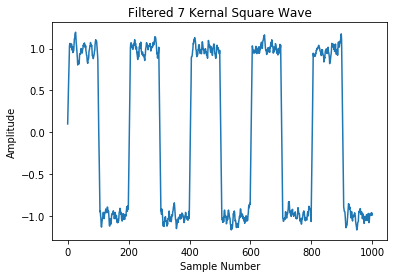

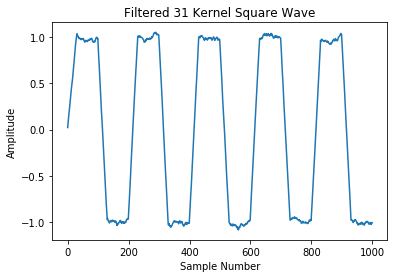

In [7]:

# generating lists from low pass square wave with different lengths to convolve with our noisy square wave
j=lowSquare(7)
q=lowSquare(31)
u=myconv(j,noisySignal)
z=myconv(q,noisySignal)

plt.plot(u[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Filtered 7 Kernal Square Wave")
plt.show()

plt.plot(z[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Filtered 31 Kernel Square Wave")
plt.show()

# The differences are clearly evident with the signal to noise ratio being much higher by having more number of kernels
# in our low pass square

# 1e)

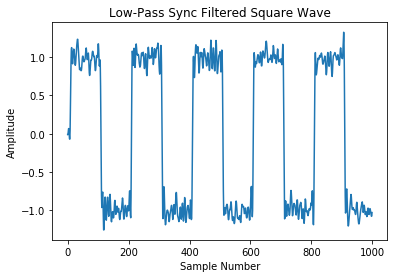

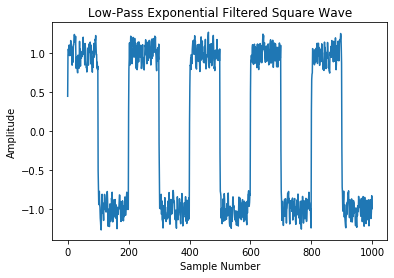

In [8]:

# generating lists from low pass exponential and sync filter to convolve with our noisy square wave
w23=lowSync(21)
e23=lowExp(21)

f23=myconv(w23,noisySignal)
g23=myconv(e23,noisySignal)


plt.plot(f23[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Low-Pass Sync Filtered Square Wave")
plt.show()

plt.plot(g23[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Low-Pass Exponential Filtered Square Wave")
plt.show()

# The low pass sync appears to only reduce the middle portion of the square wave noise while having little or no 
# effect on the edges of the squares

# The low pass exponential filter appears to have a very small effect on decreasing noise levels. I would not use 
# this particular filter on a square wave because does not remove enough of the noise. Some cycles of the wave do appear
# to have smaller noise ampltiude on one side and no effect on other just in the shape of the exponential kernal as
# clearly evident between sample 0-100 below

# 1f)

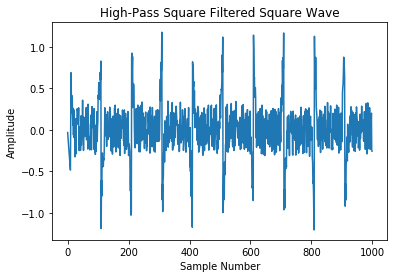

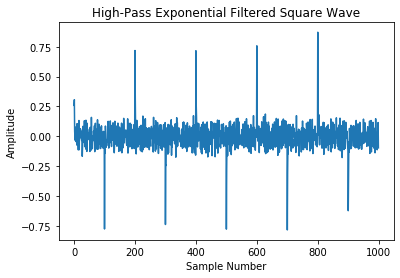

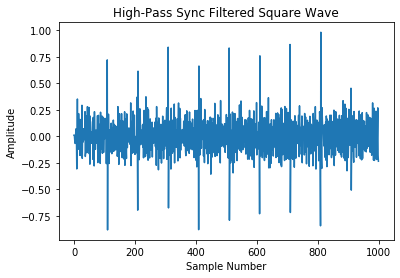

In [9]:
k12=highSquare(21)
f12=highExp(21)
v12=highSync(21)

j12=myconv(k12,noisySignal)
p12=myconv(f12,noisySignal)
m12=myconv(v12,noisySignal)


plt.plot(j12[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("High-Pass Square Filtered Square Wave")
plt.show()


plt.plot(p12[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("High-Pass Exponential Filtered Square Wave")
plt.show()

plt.plot(m12[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("High-Pass Sync Filtered Square Wave")
plt.show()

# The high pass filters only keep some of the signal as the square wave cycle at the peaks has a lot of low frequency 
# clusters and the filter only allows higher frequencies. which is why the "noise", which is part of the signal, is 
# dropped to zero in all three high pass filters

# 1g)

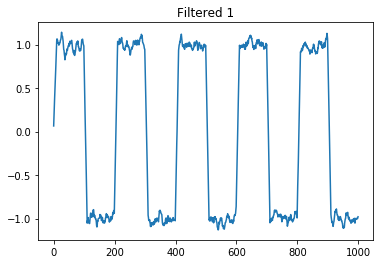

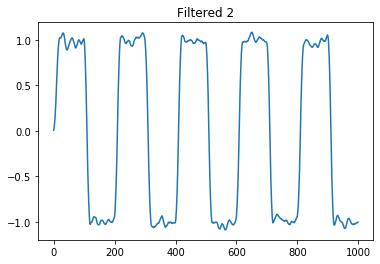

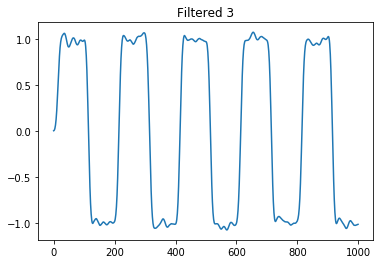

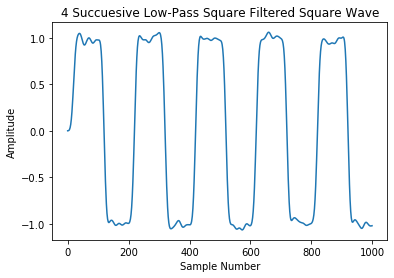

In [10]:
q123=lowSquare(11)


f123=myconv(q123,noisySignal)
g123=myconv(q123,f123)
h123=myconv(q123,g123)
i123=myconv(q123,h123)

plt.plot(f123[0:1000])
plt.title("Filtered 1")
plt.show()
plt.plot(g123[0:1000])
plt.title("Filtered 2")
plt.show()
plt.plot(h123[0:1000])
plt.title("Filtered 3")
plt.show()
plt.plot(i123[0:1000])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("4 Succuesive Low-Pass Square Filtered Square Wave")
plt.show()


# I plotted all succuessive filter to observe the difference and it is evident that graphs tends to get smoother with 
# filtering repetitively. Applying it once removes a lot of noise but the graph is not as smooth and still appears to
# be "thicker" which implies the existence of noise still. The frequency of the noise is higher than that of the signal,
# as the signal is basically a straight line.

# 2a) and 2b)

In [11]:
import IPython
from scipy.io import wavfile

# Generating the sin waves at each note frequency and all having the same number of samples points and sampling frequency.
# The same number of sample points are acheived by having the same number of cycles and period which would be the time input
# into our sin wave. The Ts is the same since samplying frequency is the same so a sample is recorded every Ts 
# in 0<t<cycles*T

Amp=25000 # Amplitude of the sin wave
fB=246.94
fC=261.63
fD=293.66
fE=329.63
fF=349.23
fG=392.00
fA=440.01
TB=1/fB
TC=1/fC
TD=1/fD
TE=1/fE
TF=1/fF
TG=1/fG
TA=1/fA
T=1/500
fs=48000
Ts=1/fs # horizontal spacing of the points that "fake" a continuous signal
cycles=500 # how many cycles of the wave to save
tB=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
tC=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
tD=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
tE=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
tF=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
tG=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
tA=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve

B=Amp*np.sin(2*np.pi*fB*tB)
C=Amp*np.sin(2*np.pi*fC*tC)
D=Amp*np.sin(2*np.pi*fD*tD)
E=Amp*np.sin(2*np.pi*fE*tE)
F=Amp*np.sin(2*np.pi*fF*tF)
G=Amp*np.sin(2*np.pi*fG*tG)
A=Amp*np.sin(2*np.pi*fA*tA)

outB = np.asarray(B, dtype=np.int16)
wavfile.write('B.wav',fs,outB)

IPython.display.Audio("B.wav")

# Can listen to each note below:

In [12]:
# C
outC = np.asarray(C, dtype=np.int16)
wavfile.write('C.wav',fs,outC)

IPython.display.Audio("C.wav")

In [13]:
# D
outD = np.asarray(D, dtype=np.int16)
wavfile.write('D.wav',fs,outD)

IPython.display.Audio("D.wav")

In [14]:
# E
outE = np.asarray(E, dtype=np.int16)
wavfile.write('E.wav',fs,outE)

IPython.display.Audio("E.wav")

In [15]:
# F
outF = np.asarray(F, dtype=np.int16)
wavfile.write('F.wav',fs,outF)

IPython.display.Audio("F.wav")

In [16]:
# G
outG = np.asarray(G, dtype=np.int16)
wavfile.write('G.wav',fs,outG)

IPython.display.Audio("G.wav")

In [17]:
# A
outA = np.asarray(A, dtype=np.int16)
wavfile.write('A.wav',fs,outA)

IPython.display.Audio("A.wav")

# 2c) and 2d)

In [18]:

# Creating chords by adding the sin wave samples together
Y=len(B)
CEG=[0]*Y
BDG=[0]*Y
CEA=[0]*Y
CFA=[0]*Y

# Adding the elements of the notes together which needs to be in a loop in contrast to the next step
i=0
for i in range(0,Y):
    CEG[i]=(C[i]+E[i]+G[i])/3
    BDG[i]=(B[i]+D[i]+G[i])/3
    CEA[i]=(C[i]+E[i]+A[i])/3
    CFA[i]=(C[i]+F[i]+A[i])/3
    
# Below we add the four chords into one array, one after the other which is done without a loop
chords=CEG+BDG+CEA+CFA
#print(len(chords),Y*4)
CEGout = np.asarray(CEG, dtype=np.int16)
wavfile.write('CEG.wav',fs,CEGout)

IPython.display.Audio("CEG.wav")

# Can hear the chords below:

In [19]:
# BDG
BDGout = np.asarray(BDG, dtype=np.int16)
wavfile.write('BDG.wav',fs,BDGout)

IPython.display.Audio("BDG.wav")

In [20]:
# CEA
CEAout = np.asarray(CEA, dtype=np.int16)
wavfile.write('CEA.wav',fs,CEAout)

IPython.display.Audio("CEA.wav")

In [21]:
# CFA
CFAout = np.asarray(CFA, dtype=np.int16)
wavfile.write('CFA.wav',fs,CFAout)

IPython.display.Audio("CFA.wav")

In [22]:
# Four chords merged together
chordout = np.asarray(chords, dtype=np.int16)
wavfile.write('FourChords.wav',fs,chordout)

IPython.display.Audio("FourChords.wav")

# 2e)

In [23]:

# Generating noise and adding to each element of the four chords 
LN=len(chords)
noise=np.random.normal(0,150,LN)
#print(noise)

noisyC=[0]*LN
k=0
for k in range(0,LN):
    noisyC[k]=chords[k]+noise[k]

noisyout = np.asarray(noisyC, dtype=np.int16)
wavfile.write('noisychords.wav',fs,noisyout)

IPython.display.Audio("noisychords.wav")

# 2f)

In [24]:

# Chose a low pass filter to begin with and it filtered out the noise. Chose this filter because it was evident previously
# that the noise is more likely to be higher frequency signal which alters the original signal
j345=lowSquare(7)
q345=lowSquare(31)
u345=myconv(j345,noisyC)
z345=myconv(q345,noisyC)

f1out = np.asarray(z345, dtype=np.int16)
wavfile.write('filtered1.wav',fs,f1out)

IPython.display.Audio("filtered1.wav")

# 2g)

In [25]:
# The closer the values I chose to the frequencies being removed, the more the intensity of the F chord. Which made it 
# a little louder to hear the F note
LOWFREQEDGE=270
HIGHFREQEDGE=430

b1234, a1234 = signal.butter(4, [LOWFREQEDGE/22000,HIGHFREQEDGE/22000], 'band')
ONLYF = signal.filtfilt(b1234, a1234, CFA)


OFout = np.asarray(ONLYF, dtype=np.int16)
wavfile.write('filteredF.wav',fs,OFout)

IPython.display.Audio("filteredF.wav")

# 3a)

In [26]:


def mycorr(list1,list2):
    len1=len(list1)
    len2=len(list2)
    if len1> len2:
        h=list2
        x=list1
    else:
        h=list1
        x=list2
    len3=len(x)-len(h)+1
    #print(len3)
    y=[0]*len3
    i=0
    # Similar to convolve function, except the input is different. Now it is i+j index for one of the input's.
    # Again each value is added by moving smaller array BETWEEN the start and end of the longer array, which is also
    # different from the convolve. This means no value of the array is left outside during the calculation. I hope that 
    # last sentence makes sense
    for i in range(0,len3):
        j=0
        for j in range(0,len(h)):
            if i+j >=0:
                if i+j < len(x):
                    y[i]+=x[i+j]*h[j]
                    #print(y[i], x[i-j], h[j], i,j,i-j)
    return y

# Testing:
er34=[1,3,4,8,0]
er72=[3,1]
er32=mycorr(er34,er72)
print(er32)
real=np.correlate(er34,er72)
print(real)


[6, 13, 20, 24]
[ 6 13 20 24]


# 3b)

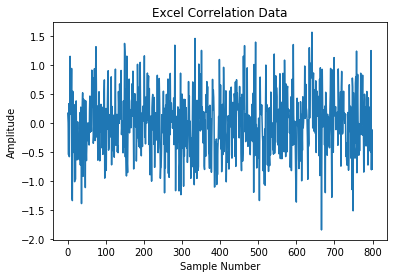

In [27]:
xcorr=np.loadtxt("xcor_data.csv",dtype= str,delimiter=",", usecols=(0))
#print(xcorr)
#print(len(xcorr))

# To multiply in the correlation function in 3a), I needed to make the string characters from excel into floats, as done
# below:
xcorr1=[0]*len(xcorr)
k=0
for k in range(0,len(xcorr)):
    xcorr1[k]=float(xcorr[k])

sam=np.arange(0,len(xcorr1),1)
plt.plot(sam,xcorr1)
#plt.yscale("log")
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Excel Correlation Data")
plt.show()

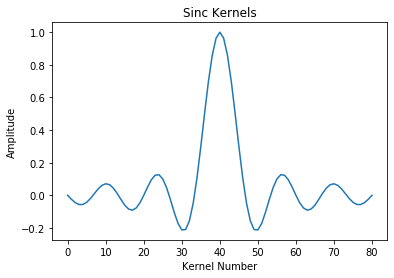

In [28]:
# Generating a sinc function with 81 kernels, so when this sinc is right above the sinc hidden inside data, the sum will
# be largest
leng=81
leng1=int(leng/2)
sinc1=[0]*leng

binW=np.linspace(-6,6,leng) # Michael Yakolev sugguested to use linspace instead of my traditional method used before

i=0
for i in range(0,leng):
    sinc1[i]=np.sinc(binW[i])
    #print(i*(binW))
    
plt.plot(sinc1)
plt.xlabel('Kernel Number')
plt.ylabel('Amplitude')
plt.title("Sinc Kernels")
plt.show()

# 3c) and 3d)

[600, 599, 601, 598, 602, 349, 350, 597, 348, 351, 603, 347, 596, 352, 560, 559, 309, 604, 333, 561, 308, 334, 255, 254, 310, 558, 474, 693, 256, 253]


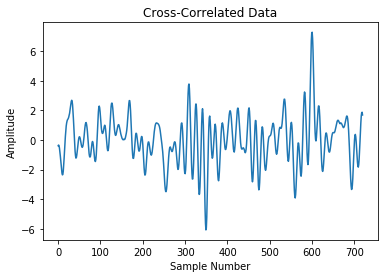

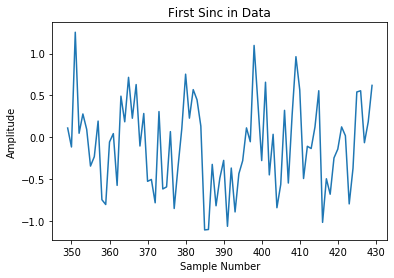

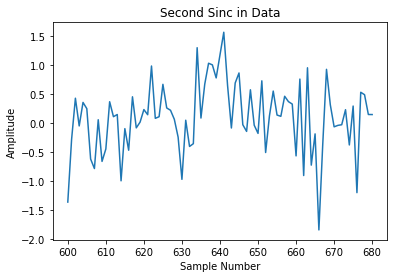

Middle point of first sinc is 391 and is upside down
Middle point of second sinc is 641 and is right side up


In [30]:
# Just a function to track max values of the data
def findPeaks(list1,peaks):
    indexs=[0]*peaks
    list2=sorted(np.abs(list1), reverse=True)
    #print(list2)
    i=0
    for i in range(0,peaks):
        j=0
        for j in range(0,len(list1)):
            if list2[i]==np.abs(list1[j]):
                indexs[i]=j
    return indexs
    
core=mycorr(xcorr1,sinc1)
peaks1=findPeaks(core,30)
print(peaks1)

plt.plot(core)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Cross-Correlated Data")
plt.show()

start1=349
plt.plot(sam[start1:(start1+81)],xcorr1[start1:(start1+81)])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("First Sinc in Data")
plt.show()

start2=600
plt.plot(sam[start2:(start2+81)],xcorr1[start2:(start2+81)])
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title("Second Sinc in Data")
plt.show()

# One sinc is shown at a peak around 350 and another at 600. Using my findPeak function, I was able to find the sample 
# number of the peak. The peak has multiple values so must ignore the same peak sample numbers; hence, the first sinc is 
# at 349 and second at 600 of the excel data, as the value indicated are the starting point of the sinc. Therefore, the 
# middle point of the sinc is as follows:

print("Middle point of first sinc is %d and is upside down" % (350+41))
print("Middle point of second sinc is %d and is right side up" % (600+41))